# Introduction to Pandas
Pandas is the workhorse of data analysis in Python. It's a library for data analysis with a focus on tabular data. Pandas is a powerful tool that not only **provides many useful classes and functions** but also does a great job of **wrapping functionality from other packages**. The result is a user interface that makes data analysis, and in particular financial analysis, a convenient and efficient task. 

To make the data-analysis workflow easier, Pandas has also integrated basic functionalities for **loading and saving data** and **plotting results**. In this introduction we will look at:
1. How to load data from a file
1. How to explore and analyze the data
1. How to plot the data

To use Pandas we need, first of all, to **import the package** with the standard abbreviation `pd`.

In [1]:
import pandas as pd

## Part 1 - Loading and Saving data with Pandas
One of the major strengths of pandas is that it can read and write different data formats natively, including:

* CSV (comma-separated values)
* XLS/XSLX (Microsoft Excel files)
* SQL (Structured Query Language)
* JSON (JavaScript Object Notation)
* HTML (HyperText Markup Language)

Table 9-1 of the Hilpisch _Python for Finance 2nd Edition_ book lists the supported formats and the corresponding import and export functions/methods of pandas and the DataFrame class, respectively. The parameters that, for example, the **`pd.read_csv()`** import function takes are described in the documentation for [**`pandas.read_csv()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

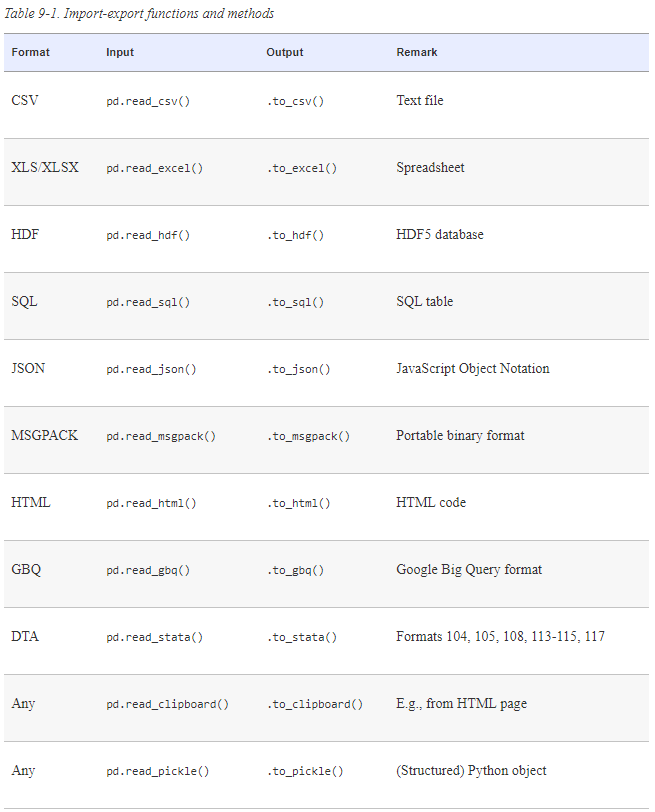

Let's start by reading our data file. Since we are using a CSV([Comma Separated Values](https://en.wikipedia.org/wiki/Comma-separated_values)) File, our best bet is

In [2]:
df = pd.read_csv('prices.csv', parse_dates=['date']) #I know that the file has a date variable stored in the column "date"
df.head()

,date,AAPL,AMZN,GOOG,MSFT
0,2018-01-02,172.259995,1189.010010,1065.000000,85.949997
1,2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2,2018-01-04,173.029999,1209.589966,1086.400024,87.110001
3,2018-01-05,175.000000,1229.140015,1102.229980,88.190002
4,2018-01-08,174.350006,1246.869995,1106.939941,88.279999


The first line loads the data from the file `prices.csv` and stores it into an object called `df`. The second line prints on screen the "head" of `df`, the first 5 lines. This is a very handy commnad if we want to learn what the data looks like. Beside [**`DataFrame.head()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) we could also use [**`DataFrame.tail()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) to show the last lines and [**`DataFrame.sample()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) to get a random sample of lines.

Please notice that the name `df` is the standard pandas object name used in the help file, but we can use any name we want as long as it follows the standard [PEP-8 naming conventions](https://peps.python.org/pep-0008/#naming-conventions) for variables and objects.

In [3]:
mickey_mouse = pd.read_csv('prices.csv', parse_dates=['date'])
mickey_mouse.head()

,date,AAPL,AMZN,GOOG,MSFT
0,2018-01-02,172.259995,1189.010010,1065.000000,85.949997
1,2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2,2018-01-04,173.029999,1209.589966,1086.400024,87.110001
3,2018-01-05,175.000000,1229.140015,1102.229980,88.190002
4,2018-01-08,174.350006,1246.869995,1106.939941,88.279999


### New Data types in Pandas

Pandas introduces two new data types:
* **`DataFrame`**: a 2-dimensional object that represents data in a table with columns and rows.
* **`Series`**: a 1-dimensional object that is used to store single series of data, for example the time series of prices for a stock.

In our case `df` is clearly a DataFrame (hence the standard name `df`...) with 5 columns: the date and the four stocks.

If we were to "extract" a single column into its own object, for example the price of Apple shares, we would get a Series. Please notice that DataFrames and Series are printed on screen with different fonts. 

In [4]:
AAPL = df['AAPL']
AAPL.head()

0    172.259995
1    172.229996
2    173.029999
3    175.000000
4    174.350006
Name: AAPL, dtype: float64

### Indexing
Both types of objects, Series and DataFrame, are _"indexed"_, that means that **each observation (row) is labelled and identified**  by an index. In the case of `df` the index is simply the sequential observation number (0, 1, 2, 3, 4) in bold on the left-hand side of the table.

**Choosing the right index** is fundamental for being able to use the most powerful functionalities of Pandas. In our case, clearly, what identifies each observation, each row, is the date. So we should use the column `date` as index of the DataFrame. Let's **change the index** of the DataFrame:

In [5]:
df = df.set_index('date')
df.head()

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-02,172.259995,1189.010010,1065.000000,85.949997
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-04,173.029999,1209.589966,1086.400024,87.110001
2018-01-05,175.000000,1229.140015,1102.229980,88.190002
2018-01-08,174.350006,1246.869995,1106.939941,88.279999


Now we see that the date column is set apart from the others, and functions as the index of the DataFrame. If we want to go back and put date into the table we can simply use the opposite function [**`DataFrame.reset_index()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)

In [6]:
old_version = df.reset_index()
old_version.head()

,date,AAPL,AMZN,GOOG,MSFT
0,2018-01-02,172.259995,1189.010010,1065.000000,85.949997
1,2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2,2018-01-04,173.029999,1209.589966,1086.400024,87.110001
3,2018-01-05,175.000000,1229.140015,1102.229980,88.190002
4,2018-01-08,174.350006,1246.869995,1106.939941,88.279999


____
### Coding Issue

Please notice that we can specify which column we want to use as index in a DataFrame **directly in the data import statement**. For example, we can get the same result as before by using.

In [7]:
df = pd.read_csv('prices.csv', parse_dates=['date'], index_col='date')
df.head()

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-02,172.259995,1189.010010,1065.000000,85.949997
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-04,173.029999,1209.589966,1086.400024,87.110001
2018-01-05,175.000000,1229.140015,1102.229980,88.190002
2018-01-08,174.350006,1246.869995,1106.939941,88.279999


Alternative we can **chain the method** `df.set_index()` directly after the import statement. [Method chaining](https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69) in Pandas can be very handy when we need to condensate multiple operations into a single command.

In [8]:
df = pd.read_csv('prices.csv', parse_dates=['date']).set_index('date')
df.head()

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-02,172.259995,1189.010010,1065.000000,85.949997
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-04,173.029999,1209.589966,1086.400024,87.110001
2018-01-05,175.000000,1229.140015,1102.229980,88.190002
2018-01-08,174.350006,1246.869995,1106.939941,88.279999


___
## Part 2 - Explore the Data

### Extracting Data
Normally we do not want to use ALL the data in a DataFrame in every calculation we do, so we need to learn how to extract and use parts of the data.

We can use the [**`DataFrame.index`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html) attribute to extract the index object. Please notice that this is an **attribute** and not a **method**. The main difference is the lack of parenthesis. Methods transform the variables or data while attributes give you more information about the data that you have.

In [9]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=756, freq=None)

We can use the [**`DataFrame.columns`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) attribute to extract the name of the columns.

In [10]:
df.columns

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype='object')

We can extract individual data points (in this case daily prices) by using the **appropriate index value** together with the [**`DataFrame.loc`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) functionality.

In [11]:
df.loc['2018-01-03']

AAPL     172.229996
AMZN    1204.199951
GOOG    1082.479980
MSFT      86.349998
Name: 2018-01-03 00:00:00, dtype: float64

We can pass **multiple values** as a list:

In [12]:
df.loc[['2018-01-03' , '2018-01-10']]

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-10,174.289993,1254.329956,1102.609985,87.820000


Since our index is numerical (dates in this case) we can also **specify a range**:

In [13]:
df.loc['2018-01-03' : '2018-01-10']

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-04,173.029999,1209.589966,1086.400024,87.110001
2018-01-05,175.000000,1229.140015,1102.229980,88.190002
2018-01-08,174.350006,1246.869995,1106.939941,88.279999
2018-01-09,174.330002,1252.699951,1106.260010,88.220001
2018-01-10,174.289993,1254.329956,1102.609985,87.820000


We can also extract data by **position (row number)**, rather than index name, by using the functionality [**`DataFrame.iloc`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html). Please remember that numerical ranges in python work in a peculiar way, for example ranges start from 0 and the last element is not included. 

In [14]:
df.iloc[1:5]

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-04,173.029999,1209.589966,1086.400024,87.110001
2018-01-05,175.000000,1229.140015,1102.229980,88.190002
2018-01-08,174.350006,1246.869995,1106.939941,88.279999


And, fianlly, we have already seen how we can use the name of the column to **extract an individual series** of data

In [15]:
df['AMZN']

date
2018-01-02    1189.010010
2018-01-03    1204.199951
2018-01-04    1209.589966
2018-01-05    1229.140015
2018-01-08    1246.869995
                 ...     
2020-12-24    3172.689941
2020-12-28    3283.959961
2020-12-29    3322.000000
2020-12-30    3285.850098
2020-12-31    3256.929932
Name: AMZN, Length: 756, dtype: float64

### Basic Analytics
Let's now focus on some basic pandas fucntions for data analysis. We can get meta-information regarding the data, columns, and index using the [**`DataFrame.info()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method. This will tell us, for each column:
* The number of non-missing values
* The type of data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2018-01-02 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   AMZN    756 non-null    float64
 2   GOOG    756 non-null    float64
 3   MSFT    756 non-null    float64
dtypes: float64(4)
memory usage: 45.7 KB


We can get summary statistic information on our variables using the method [**`DataFrame.describe()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html):

In [17]:
df.describe()

,AAPL,AMZN,GOOG,MSFT
count,756.000000,756.000000,756.000000,756.000000
mean,219.166462,2038.632572,1261.494343,141.602401
std,75.851697,571.897895,198.383237,41.789630
min,106.839996,1189.010010,976.219971,85.010002
25%,174.169994,1677.464996,1111.317474,106.277498
50%,200.644997,1829.619995,1197.125000,135.349998
75%,257.735001,2150.102600,1394.399963,174.422504
max,506.089996,3531.449951,1827.989990,231.649994


In addition, one can easily apply individual mathematical functions to the entire table or to individual columns:

In [18]:
df.mean()

AAPL     219.166462
AMZN    2038.632572
GOOG    1261.494343
MSFT     141.602401
dtype: float64

In [19]:
df['AAPL'].std()

75.85169684370356

We do not have built-in method for every calculation. For example if we try to caluclate the logarithm of the prices by using
```python
df.log()
```
...we will receive the following error message

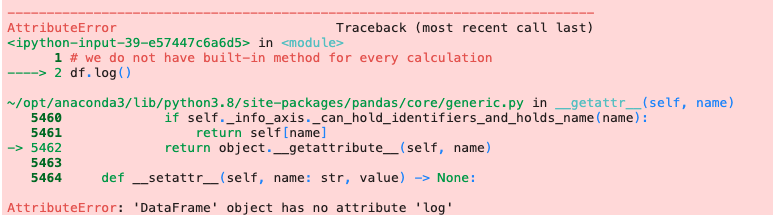

This is because, for some reason, the logarithm function is not implemented in Pandas. In this case **we need to get it from Numpy**.

In [20]:
import numpy as np

np.log(df)

,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-01-02,5.149005,7.080876,6.970730,4.453766
2018-01-03,5.148831,7.093571,6.987010,4.458409
2018-01-04,5.153465,7.098037,6.990625,4.467172
2018-01-05,5.164786,7.114070,7.005091,4.479494
2018-01-08,5.161065,7.128392,7.009355,4.480514
...,...,...,...,...
2020-12-24,4.882575,8.062335,7.460979,5.406050
2020-12-28,4.917716,8.096805,7.482170,5.415923
2020-12-29,4.904311,8.108322,7.472342,5.412315


___
### Exercise 4.01
The file `tesla.csv` contains monthly return and trading volume for Tesla (from 2010 to the end of 2020).
* Load the data in a DataFrame called `tesla_data`. Pay attention that, in this csv, the date column is called _time_.
* Index the DataFrame by the date column
* Show on screen the first lines of `tesla_data`

In [21]:
tesla_data = pd.read_csv('tesla.csv', parse_dates=['time'], index_col='time')
tesla_data.head()

,ret,volume
time,,
2010-07-30,-0.163240,657886
2010-08-31,-0.023069,153193
2010-09-30,0.047485,183742
2010-10-29,0.070326,67145
2010-11-30,0.617674,288315


Use the `DataFrame.describe()` method to get an idea of the statistic properties of the variables.

In [22]:
tesla_data.describe()

,ret,volume
count,126.000000,1.260000e+02
mean,0.054938,1.632461e+06
std,0.185604,2.133297e+06
min,-0.246250,6.714500e+04
25%,-0.069464,4.827028e+05
50%,0.014832,1.182748e+06
75%,0.128460,1.853958e+06
max,0.810706,1.733195e+07


Create a variable called `mean_return` with the **average monthly return** of Tesla.

In [23]:
mean_return = tesla_data['ret'].mean()

Create a variable called `standard_dev` with the **monthly standard deviation** of the returns of Tesla.

In [24]:
standard_dev = tesla_data['ret'].std()

Calculate the monthly Sharpe Ratio for Tesla assuming a monthly risk free rate of 0.08%. For simplicity let's use the simple definition of Sharpe ratio:

$$ S = \frac{E[r] - rf}{\sigma_{r}} $$

Save the results in a variable called `sharpe`

In [25]:
sharpe = (mean_return - 0.0008) / standard_dev

sharpe

0.29168287111794317

If you have done your calculations correctly, you should observe a monthly Sharpe Ratio of around `0.292`. 

Let's recalculate the Sharpe Ratio **on an annual basis**. This requires us to multiply the mean returns by 12 and the standard deviation by the squared root of 12. The annual risk free ratio is 1%. 

Please notice that pandas does not have a squared root operator, so we need to use the numpy function [**`np.sqrt()`**](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html).

In [26]:
annualized_mean_return = tesla_data['ret'].mean() * 12
annualized_standard_dev = tesla_data['ret'].std() * np.sqrt(12)

annualized_sharpe = (annualized_mean_return - 0.01) / annualized_standard_dev

annualized_sharpe

1.00979697516484

And you should obtain an annualized Sharpe Ratio of around `1.00`

___
### Exercise 4.02
The file `shares.csv` contains the following data for the 2000 largest companies listed in the US stock market:
1. The ticker of the company (`ticker`)
1. The name of the company (`name`)
1. The industry in which the company operates (`industry`)
1. The market capitalization of the company in billions (`size`)
1. The Average annual return between 2015 and 2019 (`ret`)
1. The Beta of the stock measured at the end of 2014 (`beta`)

Using this file you should:

* Load the data in a DataFrame called `large_cap` indexed by the ticker column
* Show on screen the first lines of `large_cap`

In [27]:
large_cap = pd.read_csv('shares.csv', index_col='ticker')
large_cap.head()

,name,industry,size,ret,beta
ticker,,,,,
AAPL,APPLE INC,Business Equipment,643.12012,0.236708,1.289383
XOM,EXXON MOBIL CORP,"Oil, Gas, and Coal",391.48221,-0.016955,0.493250
MSFT,MICROSOFT CORP,Business Equipment,381.72610,0.304496,1.195665
JNJ,JOHNSON & JOHNSON,Healthcare,292.70294,0.098696,0.461693
WFC,WELLS FARGO & CO NEW,Finance,284.38553,0.027379,0.839797


According to the CAPM (Capital Asset Pricing Model), there should be a positive correlation between the beta of a stock (a measure of systematic risk) and its future return. Test this hypothesis by **measuring the correlation between betas and returns** in `ds`. Please notice that we have not seen how to measure correlations. See if you can _google your way out of this problem_.

In [28]:
# Possible Solution 1
large_cap.corr()

/var/folders/47/6csdfwzj2h5bcrt2c01yt23mhwsl5n/T/ipykernel_11643/481704244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  large_cap.corr()


,size,ret,beta
size,1.000000,0.080297,-0.078800
ret,0.080297,1.000000,-0.093851
beta,-0.078800,-0.093851,1.000000


In [29]:
# Possible Solution 2
large_cap['ret'].corr(large_cap['beta'])

-0.09385146297061113

If you have done your job correctly you should observe a correlation of `-0.0938`.

___
## Part 3 - Data Visualization with Pandas
Although there are many visualization packages available in Python, [`matplotlib`](https://matplotlib.org/) has established itself as the benchmark and, in many situations, a robust and reliable visualization tool. It is both easy to use for standard plots and flexible when it comes to more complex plots and customizations. In addition, it is **tightly integrated with pandas** and most plots can be generated directly from the DataFrame.

`matplotlib` only allows for the generation of plots in the form of bitmaps (for example, in PNG or JPG format). Other packages, such as `plotly`, allow for interactive and also embeddable plots (interactive, for example, in that one can zoom in to inspect certain areas in greater detail). In our subject we will only use static plotting so we will stick with `matplotlib`.

Before we can start plot we need to **add a special command** to tell Jupyter that we want to show the graphs **inside the notebook**.

In [30]:
%matplotlib inline

The basic functionality for data visualization in Pandas is the [**`.plot()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method for Series and DataFrames. For example we can simply plot the series of the stock price for Amazon by writing

<Axes: xlabel='date'>

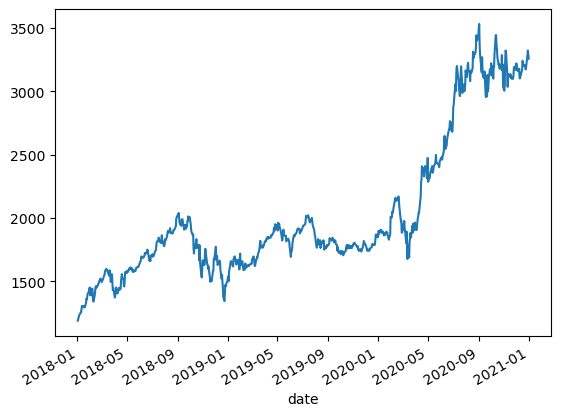

In [31]:
df['AMZN'].plot()

As you can see we did not pass any argument and Pandas, so we get the default line graph. A series is always **plotted against its own index**. In this case since the index is a date, it is authomatically formatted in the proper way.

Of course we can pass **additional arguments** to modify the graph:

<Axes: title={'center': 'Amazon Stock Price'}, xlabel='Time', ylabel='Price'>

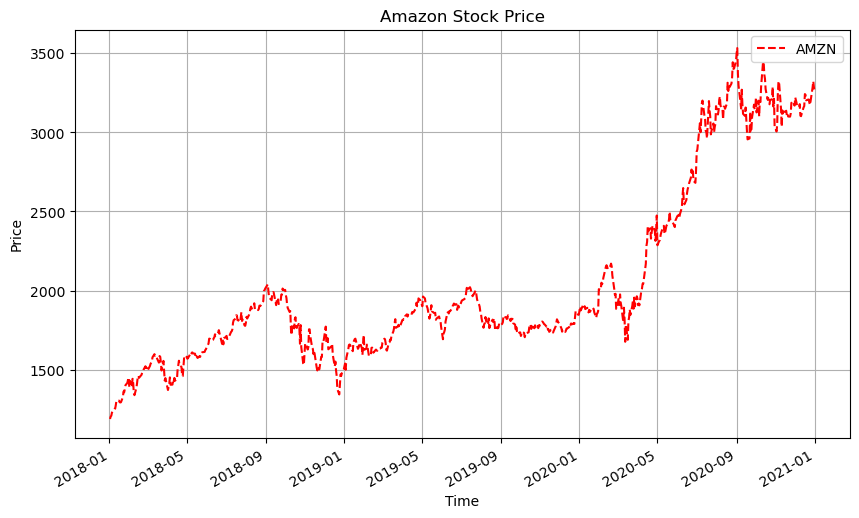

In [32]:
df['AMZN'].plot(style='r--', #we ask for a red dashed line
                title='Amazon Stock Price', #we choose the graph title
                ylabel='Price', #we specify the label for the vertical axis
                xlabel='Time', #we specify the label for the horizontal axis
                grid=True, #we show a grid
                legend=True, #we show the legend
                figsize=(10,6)) #we specify the picture size

We can also plot an **entire DataFrame**. In this case each column will be a different line in the graph. 

<Axes: title={'center': 'Stock Prices'}, xlabel='Time', ylabel='Price'>

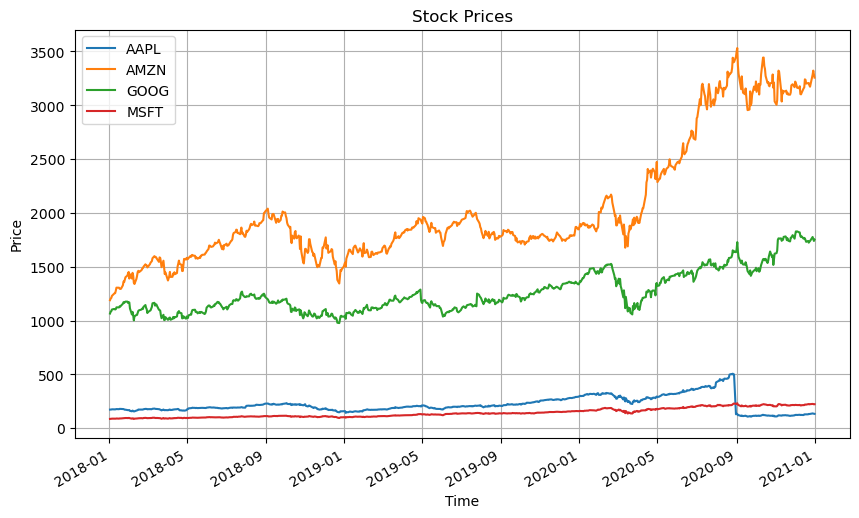

In [33]:
df.plot(title='Stock Prices',
        ylabel='Price',
        xlabel='Time',
        grid=True, 
        legend=True,  
        figsize=(10,6))

While line graph is the default type, we can also **specify different kinds** of representation. Here we use an histogram graph to plot the distribution of the betas of the stocks.

<Axes: title={'center': 'Beta Distribution U.S. Stock Market'}, ylabel='Frequency'>

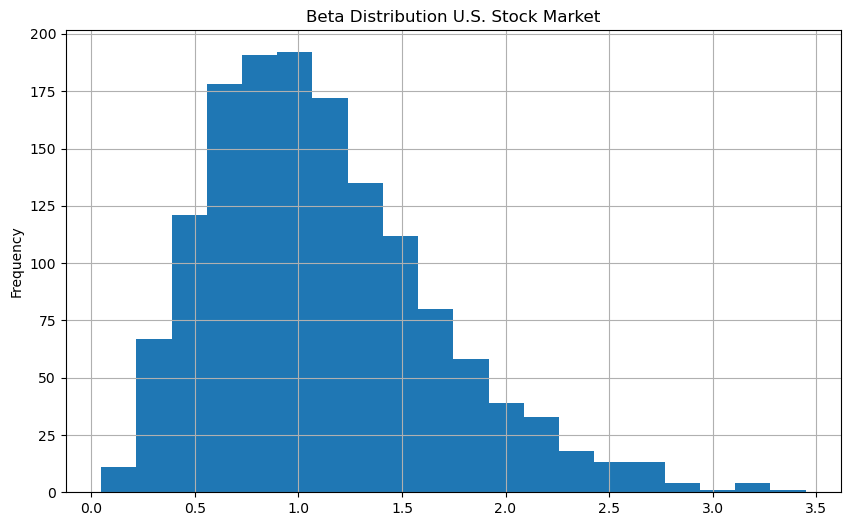

In [34]:
#we import the data again just to be sure that we are usign the same DataFrame
large_cap = pd.read_csv('shares.csv', index_col='ticker')

large_cap['beta'].plot(kind='hist',
                       title='Beta Distribution U.S. Stock Market',
                       bins=20, #this specifies the number of bins in the graph
                       grid=True,
                       figsize=(10,6))

Being able to show a graph on screen is great, but sometimes we may want to use the graph in another application, for example as an image in a presentation or report. To be able to export the graph as a picture we need to assign a name to the graph and then we can save it by concatenating the [**`.get_figure()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.artist.Artist.get_figure.html?highlight=get_figure#matplotlib.artist.Artist.get_figure) and [**`.savefig()`**](https://matplotlib.org/stable/api/figure_api.html?highlight=savefig#matplotlib.figure.Figure.savefig) methods from matplotlib. 

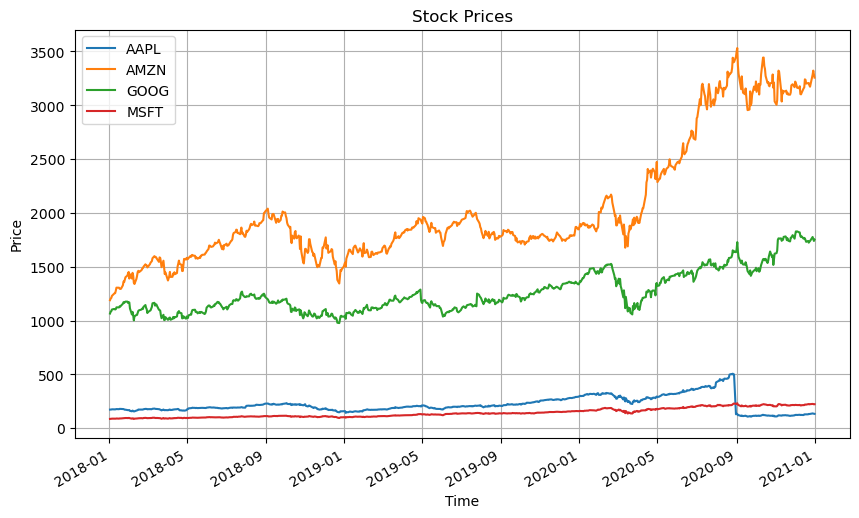

In [35]:
my_plot = df.plot(title='Stock Prices',
                         ylabel='Price',
                         xlabel='Time',
                         grid=True,
                         legend=True,
                         figsize=(10,6))

my_plot.get_figure().savefig('plot_stock_prices.jpg')

___
### Coding Issue
While we can access all the basic fucntionalities of Matplotlib from inside Pandas, some **advanced features need to be accessed by importing the package**. One very unncecessary, but nice to know functionality, is the use of "styles".

<Axes: xlabel='date'>

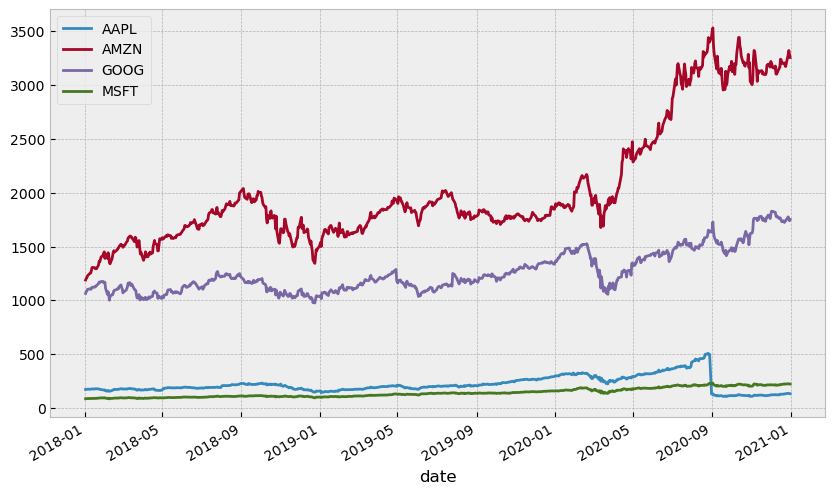

In [36]:
import matplotlib.pyplot as plt

plt.style.use('bmh')
df.plot(figsize=(10,6))

<Axes: xlabel='date'>

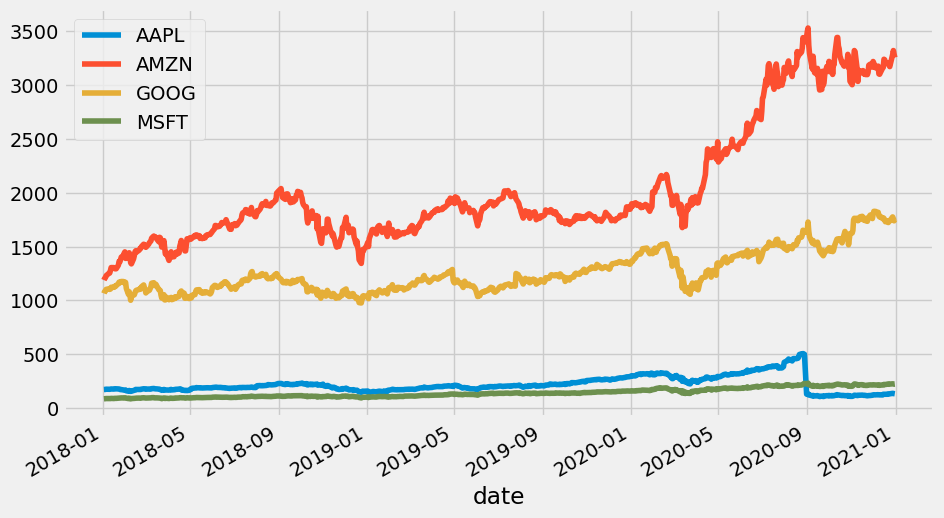

In [37]:
plt.style.use('fivethirtyeight')
df.plot(figsize=(10,6))

<Axes: xlabel='date'>

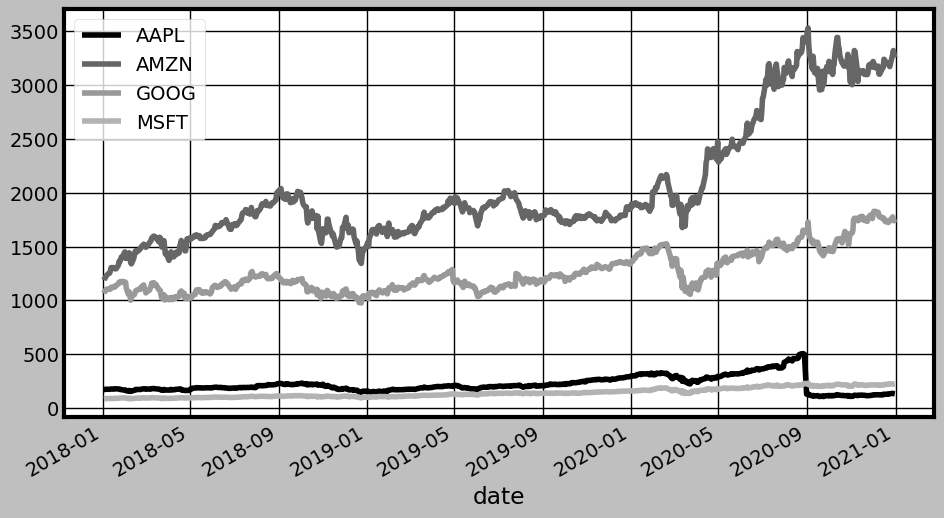

In [38]:
plt.style.use('grayscale')
df.plot(figsize=(10,6))

<Axes: xlabel='date'>

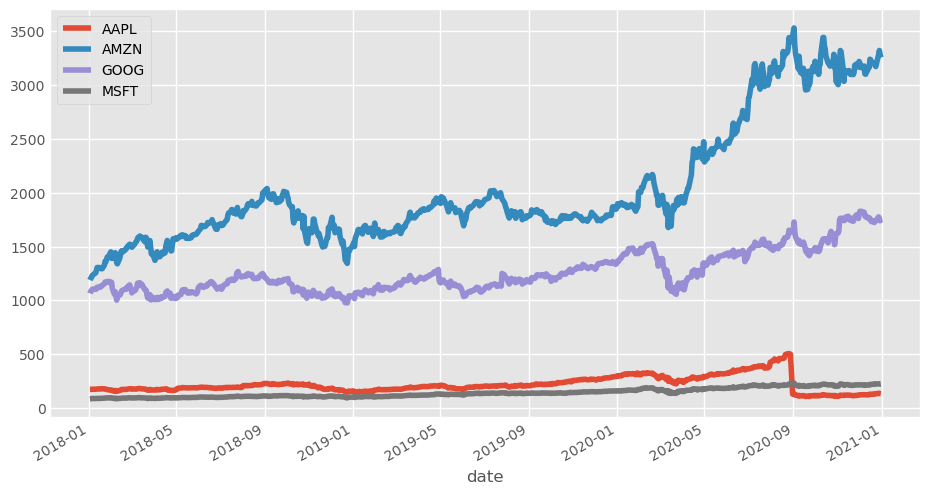

In [39]:
plt.style.use('ggplot')
df.plot(figsize=(10,6))

You can look at the [style reference sheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) to find your favourite flavour of matplotlib. Just remember that **`plt.style.use()`** works like a toggle. Once the line is used, the style will persist until it's changed again. 

It is a **best practice** to choose the style when the `matplotlib` library is imported at the top of the notebook and keep the same style for the entire notebook.

#### Colorblind Options
Please notice that among the available styles in Matplotlib we find **a colorblind** options (`tableau-colorblind10`). I will not be using this in class, but if it is more comfortable for you, feel free to **change the style** at the top of the notebook. 

<Axes: xlabel='date'>

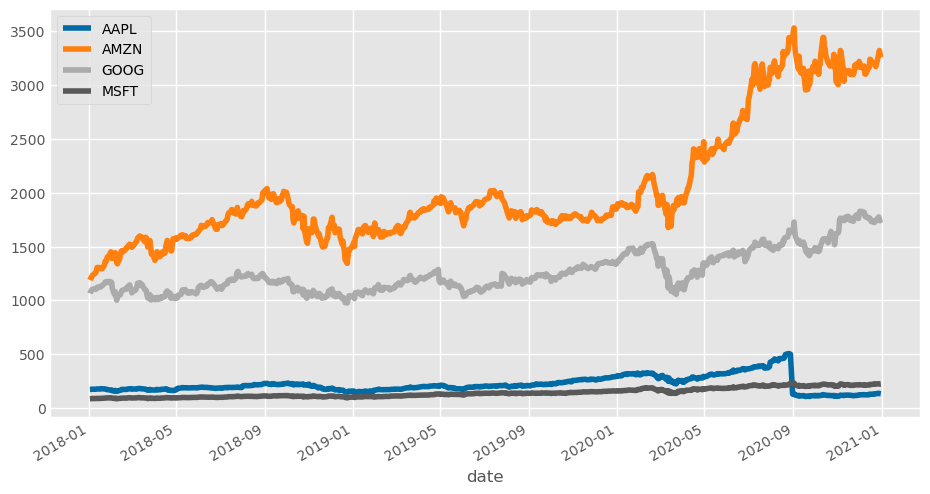

In [40]:
plt.style.use('tableau-colorblind10')
df.plot(figsize=(10,6))

#### Customizing a style
We may like a particular Matplotlib style, for example here I chose the `fivethirtyeight`, but we may want to modify some specific features to better suite our needs or preferences. Here I change the default font size and line thickness of this style. You can find more information on this in this Matplotlib [help page](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

<Axes: xlabel='date'>

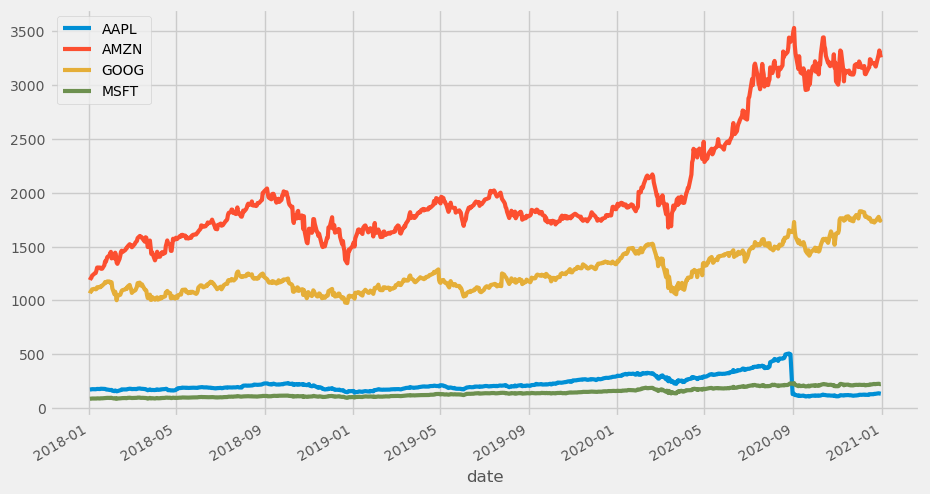

In [41]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10 
plt.rcParams['lines.linewidth'] = 3

df.plot(figsize=(10,6))

___
### Exercise 4.03
The file `shares.csv` contains the following data for the 2000 largest companies lsited in the US stock market:
1. The ticker of the company (`ticker`)
1. The name of the company (`name`)
1. The industry in which the company operates (`industry`)
1. The market capitalization of the company in billions (`size`)
1. The Average annual return between 2015 and 2019 (`ret`)
1. The Beta of the stock measured at the end of 2014 (`beta`)

We want to explore graphically if there is a correlation between size and beta of the stocks. 
* Load the data in a DataFrame called `ds` indexed by the column `ticker`.
* Add a new column to the DataFrame called `log_size` with the natural logarithm of size (there is no log function in Pandas so you will need to use the [**`np.log()`**](https://numpy.org/doc/stable/reference/generated/numpy.log.html) from Numpy
* Show on screen the first lines of `ds`

In [42]:
ds = pd.read_csv('shares.csv', index_col='ticker')
ds['log_size']=np.log(ds['size'])
ds.head()

,name,industry,size,ret,beta,log_size
ticker,,,,,,
AAPL,APPLE INC,Business Equipment,643.12012,0.236708,1.289383,6.466332
XOM,EXXON MOBIL CORP,"Oil, Gas, and Coal",391.48221,-0.016955,0.493250,5.969940
MSFT,MICROSOFT CORP,Business Equipment,381.72610,0.304496,1.195665,5.944703
JNJ,JOHNSON & JOHNSON,Healthcare,292.70294,0.098696,0.461693,5.679158
WFC,WELLS FARGO & CO NEW,Finance,284.38553,0.027379,0.839797,5.650331


Now that you have the data:
* Create a scatter-plot with log_size on the horizonatal axis and beta on the vertical axis.
* Make the plot "presentable" using the `bmh` style and adding a title.
* Export the graph in a jpg file named `size_and_beta.jpg`.

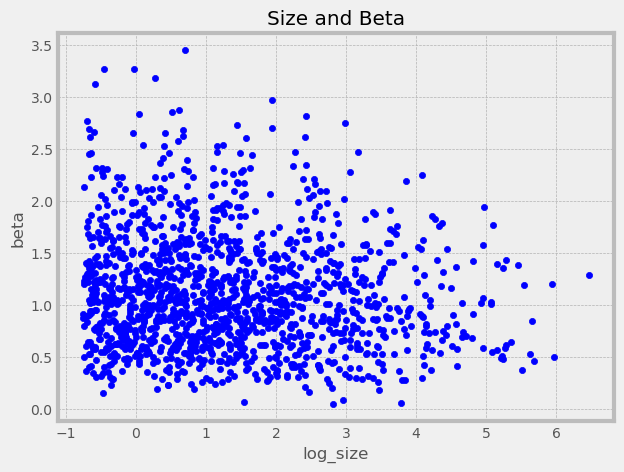

In [43]:
plt.style.use('bmh')

size_beta = ds.plot(kind='scatter',
                    x = 'log_size',
                    y = 'beta',
                    title = 'Size and Beta')

size_beta.get_figure().savefig('size_and_beta.jpg')

___
## Additional Exercises

### Exercise 4.04
You are interested in looking at the performance distribution of the stocks in the US market. From the DataFrame `ds` created in the exercise 4.03, create an histogram of the `RET` variable with:
- Purple bars
- Title: _Return distribution in the US market_
- Size of the picture 10x6
- 50 Bins

<Axes: title={'center': 'Return distribution in the US market'}, ylabel='Frequency'>

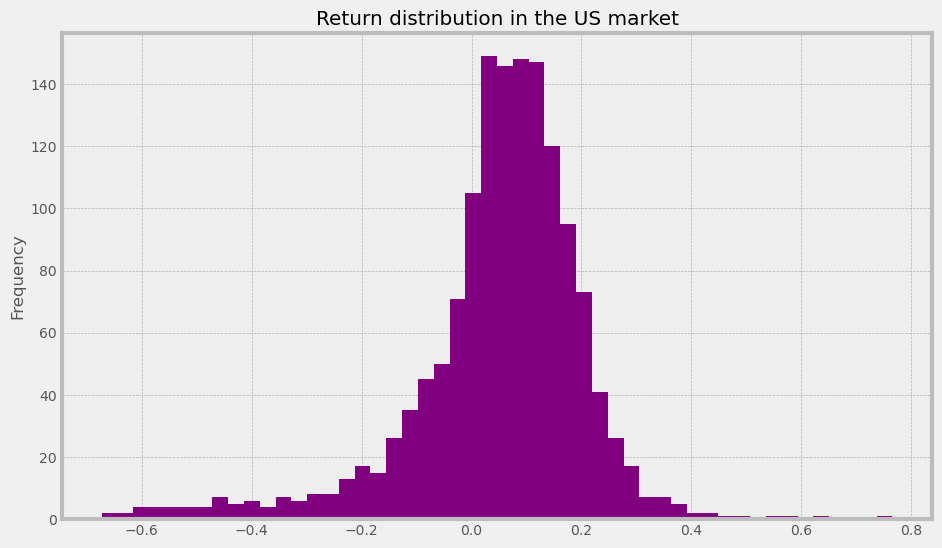

In [44]:
ds['ret'].plot(kind='hist',
                title = 'Return distribution in the US market',
                color='purple',
                bins = 50, 
                figsize=(10,6))

You will notice a number of stock with negative return. The returns are almost normally distributed (bell-shape). Plot the same data using a [Kernel Density Estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation) graph to extract the shape of the distribution courve. If you look at the "types" of graph that you can choose in **[`Dataframe.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)** you should be able to find it easily. To choose the color of the line check the [list of available colors](https://matplotlib.org/stable/gallery/color/named_colors.html) and choose a "dark orange" line. Keep the same title and figure size.

<Axes: title={'center': 'Return distribution in the US market'}, ylabel='Density'>

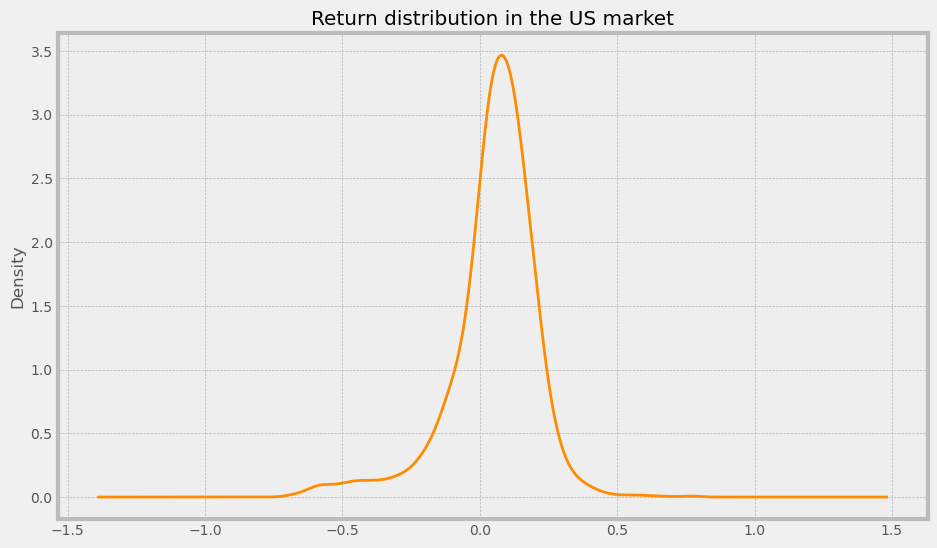

In [45]:
ds['ret'].plot(kind='kde',
                title = 'Return distribution in the US market',
                color='darkorange',
                figsize=(10,6))

As yo ucan see most of the "action" in the picture happens in the central region. Repeat the previous plot but restrict the horizontal axis to values between `(-0.5, +0.5)`. To achieve this you will need to use the parameter `xlim`.

<Axes: title={'center': 'Return distribution in the US market'}, ylabel='Density'>

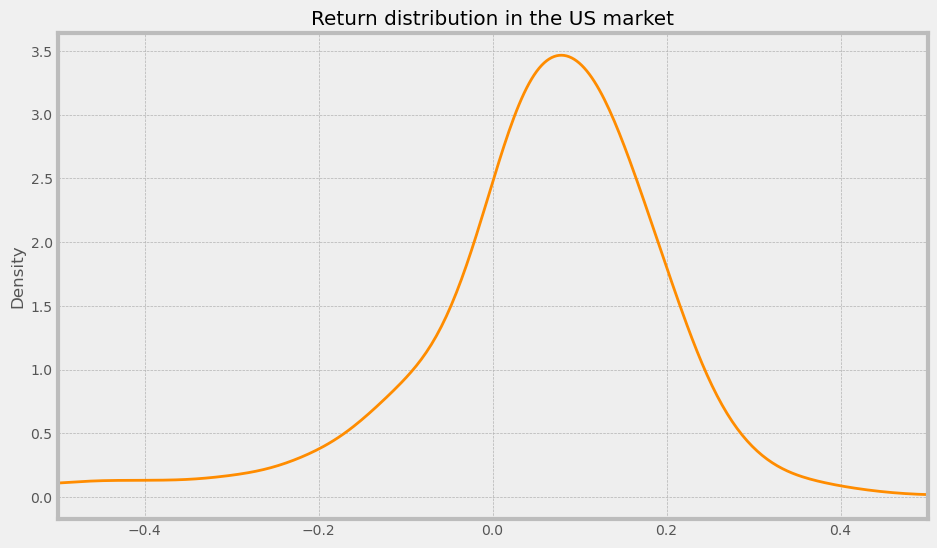

In [46]:
ds['ret'].plot(kind='kde',
                title = 'Return distribution in the US market',
                color='darkorange',
                figsize=(10,6),
                xlim=[-0.5,0.5])

___
### Exercise 4.05

The file `market_weights.csv` contains the weight of differnt industries in the US stock market in the last 30 years. Load its content into a dataframe called `weight`. After looking at the content of the file want is the best column to use as index? Set the index to that column

In [47]:
weight = pd.read_csv('market_weights.csv')
weight.head()

,year,Business Equipment,Chemicals,Consumer Durables,Consumer non Durables,Finance,Healthcare,Manufacturing,"Oil, Gas, and Coal",Other,Retail,Telecommunications,Utilities
0,1990,0.079796,0.053239,0.036558,0.123317,0.063599,0.091301,0.127006,0.114294,0.066603,0.074556,0.094350,0.075380
1,1991,0.079670,0.053403,0.030842,0.138548,0.066333,0.112676,0.121649,0.100787,0.059714,0.085024,0.079635,0.071722
2,1992,0.079623,0.056628,0.031752,0.140909,0.069826,0.113439,0.120418,0.086891,0.061023,0.092997,0.076946,0.069547
3,1993,0.086717,0.051680,0.041022,0.123904,0.083925,0.088079,0.123202,0.087735,0.064081,0.093368,0.085817,0.070470
4,1994,0.101918,0.054903,0.045982,0.112458,0.085708,0.087956,0.127752,0.082896,0.065880,0.091399,0.086145,0.057001


In [48]:
weight = weight.set_index('year')
weight.head()

,Business Equipment,Chemicals,Consumer Durables,Consumer non Durables,Finance,Healthcare,Manufacturing,"Oil, Gas, and Coal",Other,Retail,Telecommunications,Utilities
year,,,,,,,,,,,,
1990,0.079796,0.053239,0.036558,0.123317,0.063599,0.091301,0.127006,0.114294,0.066603,0.074556,0.094350,0.075380
1991,0.079670,0.053403,0.030842,0.138548,0.066333,0.112676,0.121649,0.100787,0.059714,0.085024,0.079635,0.071722
1992,0.079623,0.056628,0.031752,0.140909,0.069826,0.113439,0.120418,0.086891,0.061023,0.092997,0.076946,0.069547
1993,0.086717,0.051680,0.041022,0.123904,0.083925,0.088079,0.123202,0.087735,0.064081,0.093368,0.085817,0.070470
1994,0.101918,0.054903,0.045982,0.112458,0.085708,0.087956,0.127752,0.082896,0.065880,0.091399,0.086145,0.057001


Calculate the average weight of each industry using the method **[`DataFrame.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)** and assign hte result to a variable called `mean_weight`?

In [49]:
mean_weight = weight.mean()
mean_weight

Business Equipment       0.153188
Chemicals                0.043898
Consumer Durables        0.028157
Consumer non Durables    0.098631
Finance                  0.097047
Healthcare               0.111688
Manufacturing            0.113975
Oil, Gas, and Coal       0.078865
Other                    0.064851
Retail                   0.093012
Telecommunications       0.073739
Utilities                0.042950
dtype: float64

What type of variable is `mean_weight`? If you are not sure you can use the function **[`type()`](https://www.geeksforgeeks.org/python-type-function/)** to find out:

In [50]:
type(mean_weight)

pandas.core.series.Series

Plot `mean_weight` as a **pie chart** to show the relevance of each industry in the market. The graph should have:
- Size of 8x8
- Title: _US Stock Market_

<Axes: title={'center': 'US Stock Market'}>

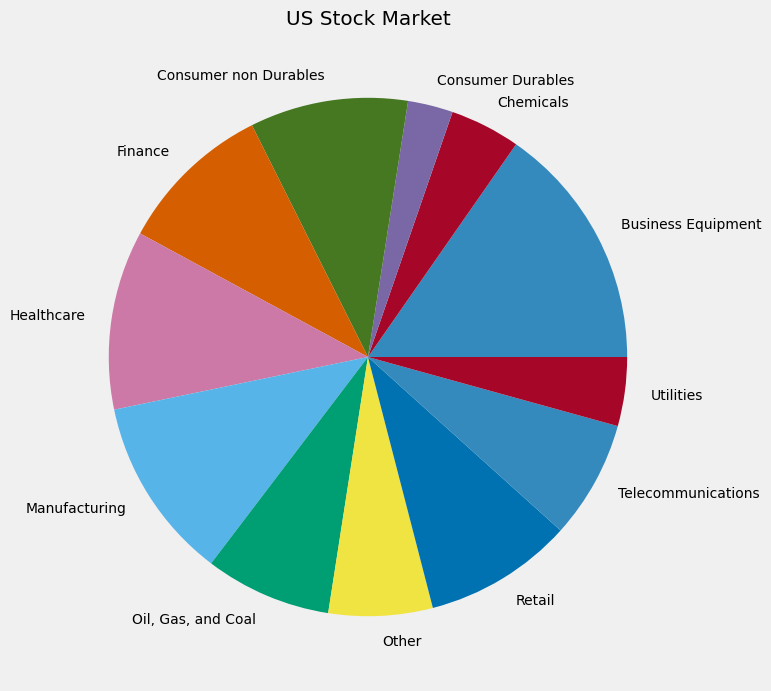

In [51]:
mean_weight.plot(kind='pie', 
                 title = 'US Stock Market', 
                 figsize=(8,8))

Funnily enough, Pandas does not explain how to add th epercentages to the plot. To do this we need to dig into the [help file](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html) of Matplotlib. To keep things simple just repeat the chart by adding `autopct='%1.1f%%'` as an additional parameter...

<Axes: title={'center': 'US Stock Market'}>

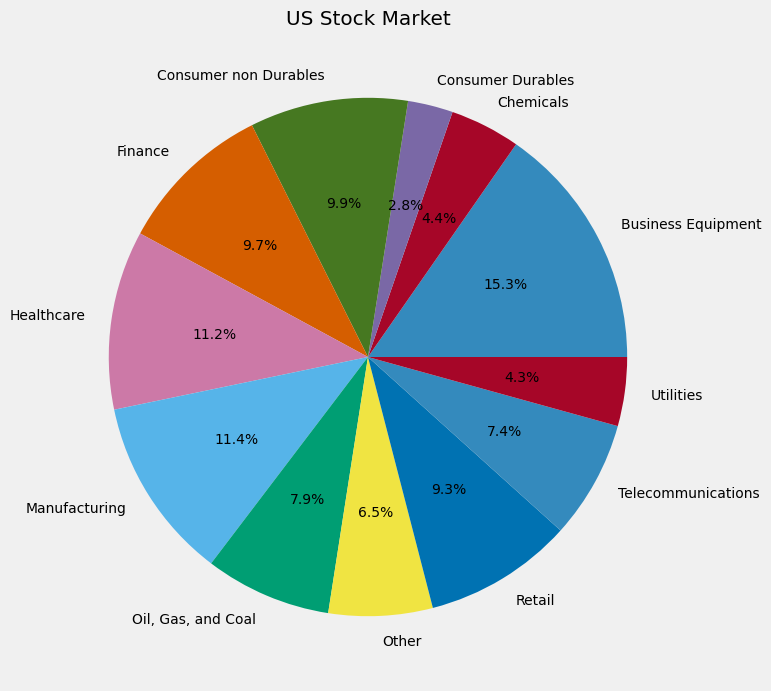

In [52]:
mean_weight.plot(kind='pie', 
                 autopct='%1.1f%%',
                 title = 'US Stock Market', 
                 figsize=(8,8))

We notice that _Business Equipment_ (tech companies) account, on average, for 15% of the market. Hs this always been like this? Let's create an **area plot** of the original `weight` DataFrame. Use a 12X6 plot size:

<Axes: xlabel='year'>

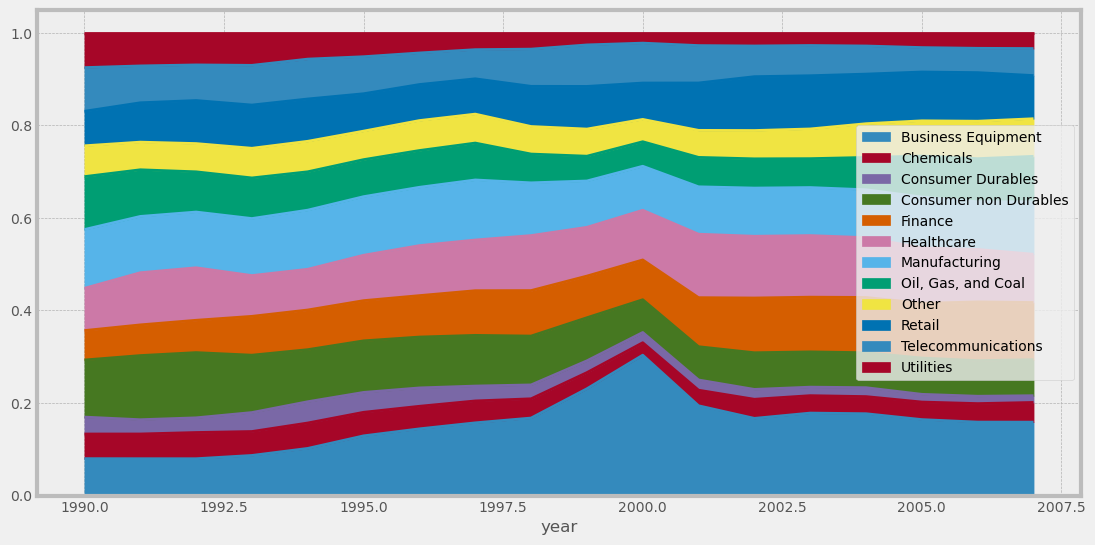

In [53]:
weight.plot(kind='area',
            figsize=(12,6))

Can yo usee the [dot-com bubble](https://en.wikipedia.org/wiki/Dot-com_bubble) of 2000? At that point in time, tech stocks accounted for 25% of the market!

By the way, this area plot does not look very good and is a bit of a messs...we will learn how to fix it and make it look good later on in the subject...